# Training Performance and Early Stopping
Early stopping is an approach to reduce overfitting the training data. This example shows how to monitor the performance during training and plot the learning curve. It also shows how to use early stopping to prematurely stop training the model at an optimal epoch.

In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

## Load data

In [2]:
# Pima Indians dataset from https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
# Loads the csv file as a NumPy array using NumPy function loadtext()
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

## Separate into fetaures (X) and label (y)

In [3]:
X = dataset[:,0:8]
y = dataset[:,8]

## Split into train and test sets

In [4]:
seed = 8
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Build the model (with evaluation metric)
Shows the test error for the `error` evaluation metric.

In [5]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]

model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.24026
[1]	validation_0-error:0.227273
[2]	validation_0-error:0.227273
[3]	validation_0-error:0.227273
[4]	validation_0-error:0.227273
[5]	validation_0-error:0.227273
[6]	validation_0-error:0.227273
[7]	validation_0-error:0.214286
[8]	validation_0-error:0.214286
[9]	validation_0-error:0.220779
[10]	validation_0-error:0.227273
[11]	validation_0-error:0.233766
[12]	validation_0-error:0.227273
[13]	validation_0-error:0.227273
[14]	validation_0-error:0.214286
[15]	validation_0-error:0.227273
[16]	validation_0-error:0.227273
[17]	validation_0-error:0.227273
[18]	validation_0-error:0.233766
[19]	validation_0-error:0.24026
[20]	validation_0-error:0.24026
[21]	validation_0-error:0.24026
[22]	validation_0-error:0.246753
[23]	validation_0-error:0.233766
[24]	validation_0-error:0.246753
[25]	validation_0-error:0.253247
[26]	validation_0-error:0.246753
[27]	validation_0-error:0.266234
[28]	validation_0-error:0.272727
[29]	validation_0-error:0.266234
[30]	validation_0-error:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBoost supports a suite of evaluation metrics not limited to:
* `rmse` for root mean squared error.
* `mae` for mean absolute error.
* `logloss` for binary logarithmic loss and `mlogloss` for multiclass log loss (cross entropy).
* `error` for classification error.
* `auc` for area under ROC curve.

## Build the model (with multiple evaluation metrics)
Shows the train error and test error, for the `error` and `logloss` evaluation metrics.

In [6]:
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.218241	validation_0-logloss:0.656496	validation_1-error:0.24026	validation_1-logloss:0.660977
[1]	validation_0-error:0.221498	validation_0-logloss:0.626512	validation_1-error:0.227273	validation_1-logloss:0.633569
[2]	validation_0-error:0.221498	validation_0-logloss:0.601164	validation_1-error:0.227273	validation_1-logloss:0.609868
[3]	validation_0-error:0.221498	validation_0-logloss:0.579424	validation_1-error:0.227273	validation_1-logloss:0.592242
[4]	validation_0-error:0.221498	validation_0-logloss:0.56066	validation_1-error:0.227273	validation_1-logloss:0.572156
[5]	validation_0-error:0.221498	validation_0-logloss:0.543092	validation_1-error:0.227273	validation_1-logloss:0.557812
[6]	validation_0-error:0.221498	validation_0-logloss:0.526821	validation_1-error:0.227273	validation_1-logloss:0.546871
[7]	validation_0-error:0.216612	validation_0-logloss:0.512728	validation_1-error:0.214286	validation_1-logloss:0.535614
[8]	validation_0-error:0.203583	validation

[69]	validation_0-error:0.13355	validation_0-logloss:0.310945	validation_1-error:0.253247	validation_1-logloss:0.495736
[70]	validation_0-error:0.135179	validation_0-logloss:0.310231	validation_1-error:0.253247	validation_1-logloss:0.495431
[71]	validation_0-error:0.13355	validation_0-logloss:0.309157	validation_1-error:0.253247	validation_1-logloss:0.495966
[72]	validation_0-error:0.135179	validation_0-logloss:0.307508	validation_1-error:0.253247	validation_1-logloss:0.49422
[73]	validation_0-error:0.136808	validation_0-logloss:0.306211	validation_1-error:0.253247	validation_1-logloss:0.495778
[74]	validation_0-error:0.136808	validation_0-logloss:0.305672	validation_1-error:0.253247	validation_1-logloss:0.494674
[75]	validation_0-error:0.135179	validation_0-logloss:0.304689	validation_1-error:0.253247	validation_1-logloss:0.49628
[76]	validation_0-error:0.135179	validation_0-logloss:0.302549	validation_1-error:0.253247	validation_1-logloss:0.496988
[77]	validation_0-error:0.130293	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Make predictions

In [7]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Evaluate predictions

In [8]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.43%


## Retrieve performance metrics

In [9]:
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

## Plot log loss

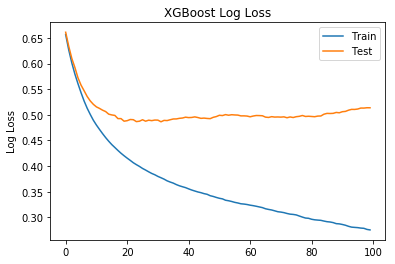

In [10]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

## Plot classification error

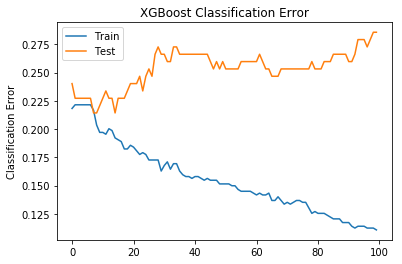

In [11]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

## Re-build model with early stopping
Specify a window of the number of epochs over which no improvement is observed (i.e. `early_stopping_rounds` parameter). In this example, we stop if no improvement over 10 epochs.

In [12]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]

model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.660977
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.633569
[2]	validation_0-logloss:0.609868
[3]	validation_0-logloss:0.592242
[4]	validation_0-logloss:0.572156
[5]	validation_0-logloss:0.557812
[6]	validation_0-logloss:0.546871
[7]	validation_0-logloss:0.535614
[8]	validation_0-logloss:0.527004
[9]	validation_0-logloss:0.520404
[10]	validation_0-logloss:0.515403
[11]	validation_0-logloss:0.512447
[12]	validation_0-logloss:0.508984
[13]	validation_0-logloss:0.506304
[14]	validation_0-logloss:0.501229
[15]	validation_0-logloss:0.499703
[16]	validation_0-logloss:0.498755
[17]	validation_0-logloss:0.49256
[18]	validation_0-logloss:0.492544
[19]	validation_0-logloss:0.487507
[20]	validation_0-logloss:0.48848
[21]	validation_0-logloss:0.490797
[22]	validation_0-logloss:0.490412
[23]	validation_0-logloss:0.486692
[24]	validation_0-logloss:0.487492
[25]	validation_0-logloss:0.490333
[26]	validation_0-logloss:0.487487

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Make predictions

In [13]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Evaluate predictions 
Compare this to the accuracy of the earlier model without early stopping.

In [14]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.03%
